In [1]:
import numpy as np
import corner
import h5py
import prospect.io.read_results as reader

In [57]:
def computeConfidenceIntervals(result, alphas=[0.682, 0.954, 0.996], **kwargs):
    '''
    result dictionary from prospector
    '''
    chain, labels = result['chain'], result['theta_labels']
    return '\n\n'.join([CI(chain, labels, a, **kwargs) for a in alphas])                                           


def CI(chain, labels, alpha, verbose=False, log=None):
    '''
    Calculate the confidence intervals around the median
    of each input parameter in the chain
    
    chain [Array] : np array of output samples from the MCMC
    alpha [float] : confidence level to compute
    center [string] : techniique to get central value of distribution
                      that the CI is based around. Supported options are
                      'median', 'mode', 'mean'
    '''
    
    if log is None:
        log = [False]*len(labels) # don't log any of the labels
    
    forFile = 'Confidence Intervals: \n\n'
    for col, label, isLogged in zip(chain.T, labels, log):
        
        if isLogged:
            col = np.log10(col)
            label = f'log10({label})'
        
        middle = 0.5
        q1 = np.quantile(col, middle-(alpha/2))
        q2 = np.quantile(col, middle)
        q3 = np.quantile(col, middle+(alpha/2))
        
        forFile += f'{label} {alpha*100}% CI:\n'
        if verbose:
            forFile += f'         Q1: {q1}\n'
            forFile += f'Q2 (median): {q2}\n'
            forFile += f'         Q3: {q3}\n'
        forFile += f'{label} = {q2} (+{q3-q2}, -{q2-q1})'
        forFile += '\n'
    print(forFile)
    return forFile

In [53]:
h5file = 'AT2018zr_23Oct30-14.12_result.h5'

In [54]:
res, obs, model = reader.results_from(h5file)

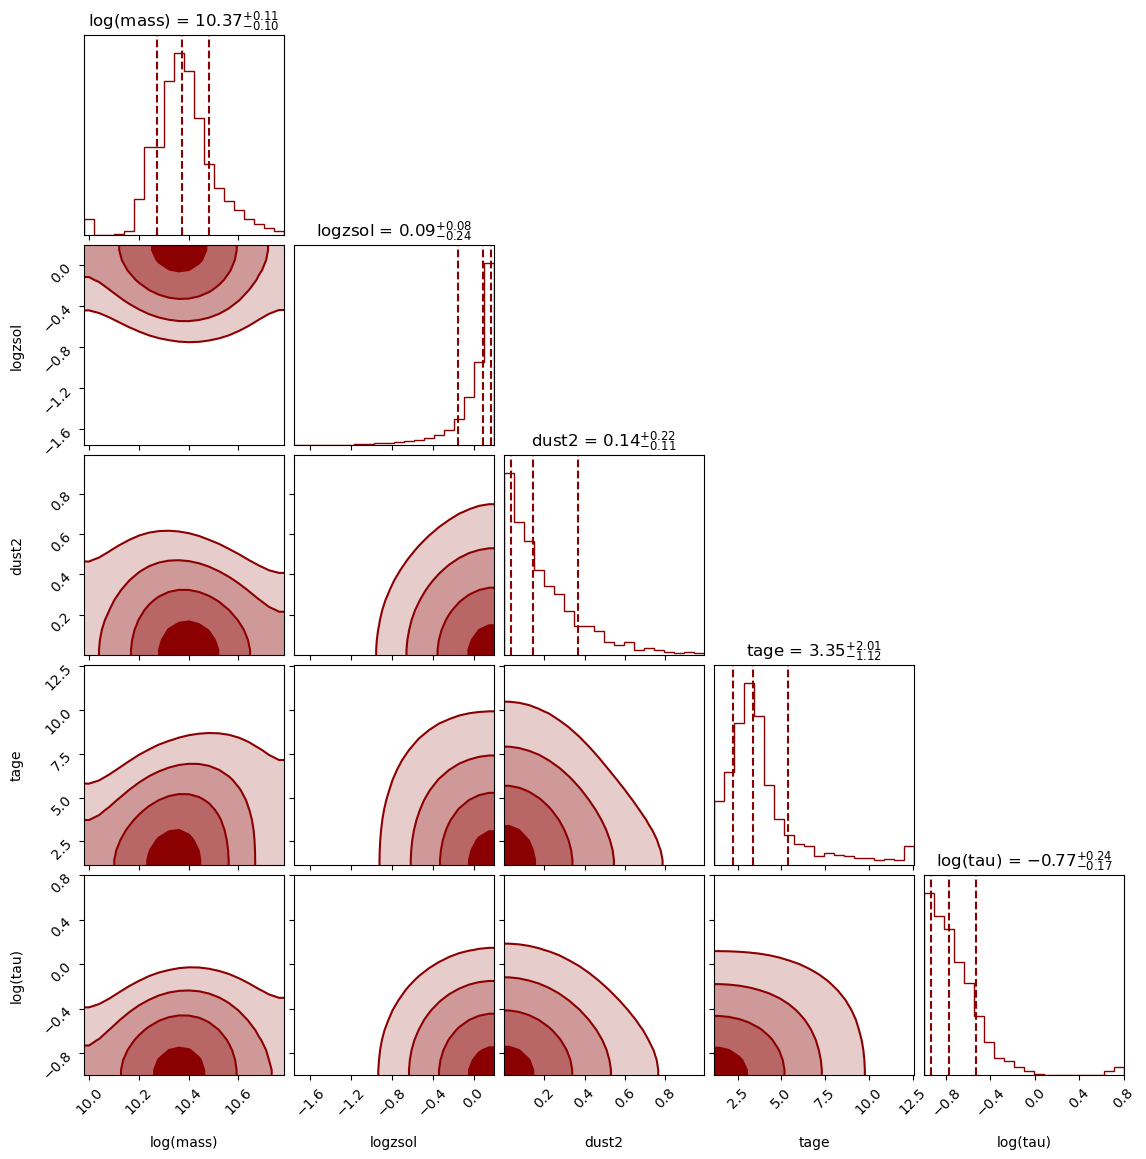

In [60]:
# Trace plots
#tfig = reader.traceplot(res)
# Corner figure of posterior PDFs
cfig = reader.subcorner(res, logify=['mass', 'tau'], bins=20, smooth=5, color='darkred')

In [59]:
log = [True, False, False, False, False]
computeConfidenceIntervals(res, alphas=[0.682], log=log)

Confidence Intervals: 

log10(mass) 68.2% CI:
log10(mass) = 10.372698280838419 (+0.11010249925992, -0.1007689799917344)
logzsol 68.2% CI:
logzsol = 0.08989983760852646 (+0.0845827020589289, -0.24115816767162274)
dust2 68.2% CI:
dust2 = 0.1431016027304792 (+0.2230795575518972, -0.10921011274213394)
tage 68.2% CI:
tage = 3.3453647946591447 (+2.0351665183650915, -1.1278561801620492)
tau 68.2% CI:
tau = 0.16909325959240493 (+0.12476919596651445, -0.05368903653282825)



'Confidence Intervals: \n\nlog10(mass) 68.2% CI:\nlog10(mass) = 10.372698280838419 (+0.11010249925992, -0.1007689799917344)\nlogzsol 68.2% CI:\nlogzsol = 0.08989983760852646 (+0.0845827020589289, -0.24115816767162274)\ndust2 68.2% CI:\ndust2 = 0.1431016027304792 (+0.2230795575518972, -0.10921011274213394)\ntage 68.2% CI:\ntage = 3.3453647946591447 (+2.0351665183650915, -1.1278561801620492)\ntau 68.2% CI:\ntau = 0.16909325959240493 (+0.12476919596651445, -0.05368903653282825)\n'